In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tlaks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tlaks\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
df=pd.read_csv("output.csv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [14]:
print(df.shape)

(1000, 2)


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Review  1000 non-null   object
 1   Liked    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [16]:
df.columns

Index([' Review', 'Liked'], dtype='object')

In [17]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [18]:
print(df['Liked'].value_counts())

Liked
1    500
0    500
Name: count, dtype: int64


In [19]:
print(df['Liked'].value_counts(normalize=True) * 100)

Liked
1    50.0
0    50.0
Name: proportion, dtype: float64


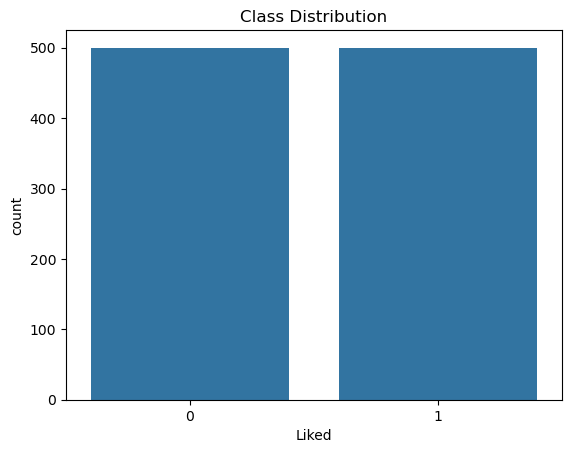

In [20]:
plt.figure()
sns.countplot(x='Liked', data=df)
plt.title("Class Distribution")
plt.show()

In [21]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
 Review    0
Liked      0
dtype: int64


In [25]:
df.columns

Index([' Review', 'Liked'], dtype='object')

In [27]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)



In [29]:
df.columns

Index([' Review', 'Liked'], dtype='object')

In [30]:
df.columns = df.columns.str.strip()

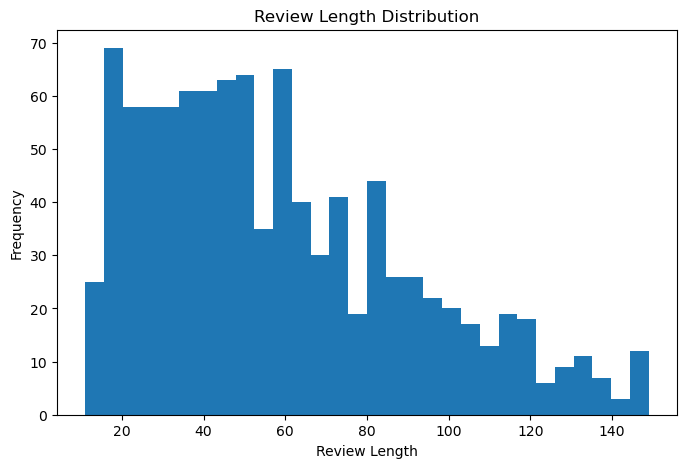

In [31]:
df["review_length"] = df["Review"].astype(str).apply(len)

plt.figure(figsize=(8,5))
plt.hist(df["review_length"], bins=30)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Review Length Distribution")
plt.show()

In [33]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)

df["clean_review"] = df["Review"].apply(clean_text)

df.head()

,Review,Liked,review_length,clean_review
0,Wow... Loved this place.,1,24,wow loved place
1,Crust is not good.,0,18,crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great price


In [34]:
vectorizer = CountVectorizer(binary=True)

X = vectorizer.fit_transform(df["clean_review"])
y = df["Liked"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training size:", X_train.shape[0])
print("Testing size:", X_test.shape[0])

Training size: 800
Testing size: 200


In [36]:
model = BernoulliNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [37]:
y_pred = model.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.75
Precision: 0.75
Recall: 0.7788461538461539
F1 Score: 0.7641509433962265


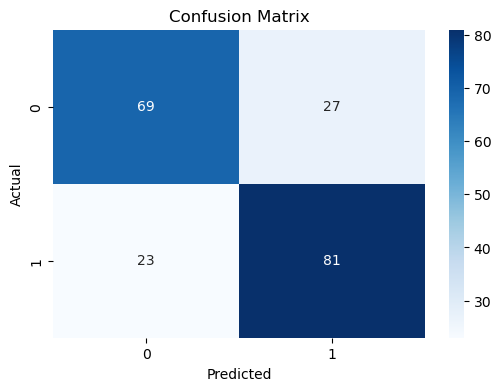

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        96
           1       0.75      0.78      0.76       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [44]:
print(confusion_matrix(y_test, y_pred))

[[69 27]
 [23 81]]


In [45]:
import pickle

# Save trained Bernoulli model
pickle.dump(model, open("bernoulli_model.pkl", "wb"))

# Save the fitted vectorizer
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

print("Model and Vectorizer saved successfully!")



Model and Vectorizer saved successfully!
